In [35]:
import tensorflow.keras.utils as utils # 분류 분석 시 원 핫 인코딩 시 
from tensorflow.keras.models import Sequential #모델 생성 시
from tensorflow.keras.layers import Dense, Activation
import numpy as np

1. 데이터 셋 생성
원본데이터 및 시뮬레이션을 통해 데이터 생성
2. 전처리
훈련셋(학습셋), 검증셋, 시험셋(테스트셋)
머신러닝 및 딥러닝 모델에서 학습 및 평가를 할 수 있도록 포맷 변환
3. 모델 구성
시퀀스 객체 생성한 뒤 필요한 add()함수를 이용해 레이어 추가
4. 모델 학습과정 설정
compile()함수 이용. loss함수, optimizer, metrics(평가지표)
5. 모델 학습 시키기
fit()함수 이용. 훈련셋입력데이터, 훈련셋타겟데이터, 학습횟수, 검증셋
6. 모델 평가
시험셋을 인자로 evaluate() 함수 이용, 그래프
7. 모델 사용
predict()함수 이용
8. 모델 저장
save()함수로 저장, load_model()함수를 이용해서 로드

## 1. 데이터 셋

In [48]:
# 학습 데이터 = 훈련 데이터
X_train = np.array(list(range(1,10))*10)
Y_train = np.array(list(range(1,10))*10)*2
# 검증 데이터
X_val = np.arange(1,10)
Y_val = np.arange(2,20,2)

In [49]:
# 분류분석을 하기 위해 target을 라벨링 전환 (원 핫 인코딩)
Y_train = utils.to_categorical(Y_train, 19)
Y_val = utils.to_categorical(Y_val, 19)

In [50]:
Y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## 2. 모델 구성하기

In [51]:
model=Sequential()
model.add(Dense(units=38, input_dim=1, activation='sigmoid'))
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))
#softmax : 모든 출력값의 합이 1. 분류분석의 마지막 layer에서 activation함수로

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 38)                76        
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2496      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 19)                627       
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 4. 모델 학습시키기

In [56]:
hist = model.fit(X_train, Y_train, epochs=300, batch_size=10, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/300
9/9 - 0s - loss: 0.4554 - accuracy: 0.9556 - val_loss: 0.4280 - val_accuracy: 1.0000
Epoch 2/300
9/9 - 0s - loss: 0.4571 - accuracy: 0.9333 - val_loss: 0.4303 - val_accuracy: 1.0000
Epoch 3/300
9/9 - 0s - loss: 0.4451 - accuracy: 0.9778 - val_loss: 0.4205 - val_accuracy: 1.0000
Epoch 4/300
9/9 - 0s - loss: 0.4423 - accuracy: 0.9778 - val_loss: 0.4181 - val_accuracy: 1.0000
Epoch 5/300
9/9 - 0s - loss: 0.4531 - accuracy: 0.9222 - val_loss: 0.4153 - val_accuracy: 1.0000
Epoch 6/300
9/9 - 0s - loss: 0.4326 - accuracy: 1.0000 - val_loss: 0.4205 - val_accuracy: 1.0000
Epoch 7/300
9/9 - 0s - loss: 0.4470 - accuracy: 0.9444 - val_loss: 0.4090 - val_accuracy: 1.0000
Epoch 8/300
9/9 - 0s - loss: 0.4378 - accuracy: 0.9667 - val_loss: 0.4270 - val_accuracy: 0.8889
Epoch 9/300
9/9 - 0s - loss: 0.4325 - accuracy: 0.9333 - val_loss: 0.4084 - val_accuracy: 1.0000
Epoch 10/300
9/9 - 0s - loss: 0.4229 - accuracy: 1.0000 - val_loss: 0.4065 - val_accuracy: 1.0000
Epoch 11/300
9/9 - 0s - loss:

Epoch 85/300
9/9 - 0s - loss: 0.2926 - accuracy: 1.0000 - val_loss: 0.2681 - val_accuracy: 1.0000
Epoch 86/300
9/9 - 0s - loss: 0.3095 - accuracy: 0.9889 - val_loss: 0.2663 - val_accuracy: 1.0000
Epoch 87/300
9/9 - 0s - loss: 0.2860 - accuracy: 1.0000 - val_loss: 0.2791 - val_accuracy: 1.0000
Epoch 88/300
9/9 - 0s - loss: 0.2800 - accuracy: 1.0000 - val_loss: 0.2544 - val_accuracy: 1.0000
Epoch 89/300
9/9 - 0s - loss: 0.2808 - accuracy: 1.0000 - val_loss: 0.2598 - val_accuracy: 1.0000
Epoch 90/300
9/9 - 0s - loss: 0.2693 - accuracy: 1.0000 - val_loss: 0.2716 - val_accuracy: 1.0000
Epoch 91/300
9/9 - 0s - loss: 0.2753 - accuracy: 1.0000 - val_loss: 0.2567 - val_accuracy: 1.0000
Epoch 92/300
9/9 - 0s - loss: 0.2705 - accuracy: 1.0000 - val_loss: 0.2618 - val_accuracy: 1.0000
Epoch 93/300
9/9 - 0s - loss: 0.2814 - accuracy: 0.9667 - val_loss: 0.2655 - val_accuracy: 1.0000
Epoch 94/300
9/9 - 0s - loss: 0.2612 - accuracy: 1.0000 - val_loss: 0.2478 - val_accuracy: 1.0000
Epoch 95/300
9/9 - 0

Epoch 168/300
9/9 - 0s - loss: 0.1788 - accuracy: 1.0000 - val_loss: 0.1590 - val_accuracy: 1.0000
Epoch 169/300
9/9 - 0s - loss: 0.1605 - accuracy: 1.0000 - val_loss: 0.1703 - val_accuracy: 1.0000
Epoch 170/300
9/9 - 0s - loss: 0.1698 - accuracy: 1.0000 - val_loss: 0.1636 - val_accuracy: 1.0000
Epoch 171/300
9/9 - 0s - loss: 0.1646 - accuracy: 1.0000 - val_loss: 0.1598 - val_accuracy: 1.0000
Epoch 172/300
9/9 - 0s - loss: 0.1869 - accuracy: 1.0000 - val_loss: 0.2022 - val_accuracy: 0.8889
Epoch 173/300
9/9 - 0s - loss: 0.1766 - accuracy: 0.9778 - val_loss: 0.1559 - val_accuracy: 1.0000
Epoch 174/300
9/9 - 0s - loss: 0.1626 - accuracy: 1.0000 - val_loss: 0.1556 - val_accuracy: 1.0000
Epoch 175/300
9/9 - 0s - loss: 0.1648 - accuracy: 1.0000 - val_loss: 0.1506 - val_accuracy: 1.0000
Epoch 176/300
9/9 - 0s - loss: 0.1648 - accuracy: 1.0000 - val_loss: 0.1486 - val_accuracy: 1.0000
Epoch 177/300
9/9 - 0s - loss: 0.1756 - accuracy: 1.0000 - val_loss: 0.1560 - val_accuracy: 1.0000
Epoch 178/

Epoch 251/300
9/9 - 0s - loss: 0.1106 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 1.0000
Epoch 252/300
9/9 - 0s - loss: 0.1048 - accuracy: 1.0000 - val_loss: 0.0999 - val_accuracy: 1.0000
Epoch 253/300
9/9 - 0s - loss: 0.1018 - accuracy: 1.0000 - val_loss: 0.0938 - val_accuracy: 1.0000
Epoch 254/300
9/9 - 0s - loss: 0.0987 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 1.0000
Epoch 255/300
9/9 - 0s - loss: 0.0999 - accuracy: 1.0000 - val_loss: 0.0939 - val_accuracy: 1.0000
Epoch 256/300
9/9 - 0s - loss: 0.0948 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 1.0000
Epoch 257/300
9/9 - 0s - loss: 0.0972 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy: 1.0000
Epoch 258/300
9/9 - 0s - loss: 0.1075 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 1.0000
Epoch 259/300
9/9 - 0s - loss: 0.0982 - accuracy: 1.0000 - val_loss: 0.0908 - val_accuracy: 1.0000
Epoch 260/300
9/9 - 0s - loss: 0.0957 - accuracy: 1.0000 - val_loss: 0.0911 - val_accuracy: 1.0000
Epoch 261/

In [9]:
hist.history

{'loss': [3.023566961288452,
  2.8965697288513184,
  2.796142101287842,
  2.7195096015930176,
  2.6537346839904785,
  2.601691961288452,
  2.5521817207336426,
  2.5064916610717773,
  2.469770908355713,
  2.435830593109131,
  2.399754762649536,
  2.371131420135498,
  2.340080738067627,
  2.3148574829101562,
  2.2898316383361816,
  2.26501202583313,
  2.245516538619995,
  2.2252464294433594,
  2.203237295150757,
  2.1852424144744873,
  2.1667847633361816,
  2.152841329574585,
  2.1324942111968994,
  2.1166696548461914,
  2.0979363918304443,
  2.0860750675201416,
  2.073822259902954,
  2.0619513988494873,
  2.043398141860962,
  2.025895357131958,
  2.012362480163574,
  2.0003936290740967,
  1.987205147743225,
  1.9690454006195068,
  1.9570568799972534,
  1.9439663887023926,
  1.928076148033142,
  1.9138742685317993,
  1.9078047275543213,
  1.8880903720855713,
  1.8755038976669312,
  1.8587108850479126,
  1.845052719116211,
  1.8273416757583618,
  1.8142410516738892,
  1.8040071725845337,


## 5. 모델 평가하기(모델 학습과정 살펴보고 evaluate)

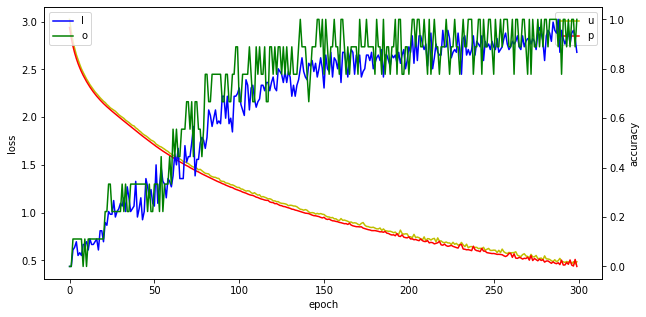

In [20]:
# 모델의 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax=loss_ax.twinx() #loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'],'b',label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend('upper left')
acc_ax.legend('lower left')
plt.show()

In [21]:
# 모델 평가하기
score = model.evaluate(X_val, Y_val, batch_size=1)

9/9 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 1.0000


In [23]:
print('평가된 loss :', score[0])
print('평가된 accuracy :', score[1]*100, '%')

평가된 loss : 0.43747177720069885
평가된 accuracy : 100.0 %


## 6. 모델 사용하기(모델을 이용해서 예측하기)

In [26]:
y_hat = model.predict(np.array([2]))
y_hat

array([[1.03352127e-11, 1.38482077e-14, 5.84086739e-02, 8.41210990e-11,
        8.59828115e-01, 1.23732405e-11, 8.07225108e-02, 2.48957837e-13,
        1.03979046e-03, 6.05155703e-10, 9.35577532e-07, 5.14492005e-10,
        4.85971707e-10, 3.03144350e-14, 8.93035984e-14, 1.74121850e-12,
        1.27075136e-18, 3.36489690e-11, 1.93819811e-24]], dtype=float32)

In [27]:
H = model.predict(np.array([2])).argmax()
H

4

In [28]:
y_hat[0,H]

0.8598281

## 7. 모델 저장하기

In [29]:
model.save('model/3_deep_begin.h5')

In [30]:
## 8. 저장된 모델 사용하기
from tensorflow.keras.models import load_model
model2=load_model('model/3_deep_begin.h5')

In [31]:
model2.predict(np.array([2])).argmax()

4

In [32]:
model2.predict_classes(np.array([2]))

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([4], dtype=int64)